# **B1. Downloading the Adult Census Income Dataset from Kaggle using kagglehub**

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")
print(path)



Using Colab cache for faster access to the 'adult-census-income' dataset.
/kaggle/input/adult-census-income


In [ ]:
import pandas as pd
#Loads the CSV file into a pandas DataFrame.
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df.dtypes


,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


# **Select relevant categorical features**

In [ ]:
#Choose discrete class not continous
categorical_features = [
    "workclass",
    "education",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native.country",
    "income"
]

df_new = df[categorical_features].copy()
df_new.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [ ]:
# Replace all '?' with 'Missing'
df_new = df_new.replace("?", "Missing")

#  check the first 5 rows to confirm
df_new.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Missing,HS-grad,Widowed,Missing,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Missing,Some-college,Widowed,Missing,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [ ]:
# Dictionary to store mappings for each feature
category_mappings = {}

# Encode each categorical feature except the target initially
for col in df_new.columns:
    df_new[col], mapping = pd.factorize(df_new[col])
    category_mappings[col] = mapping  # store mapping for interpretability

df_new.head()
#pd.factorize(df_new[col])----> Converts each unique string in the column to a unique integer
#Returns two things:
#Encoded integers (assigned to df_cat[col])
#Index of original categories (stored in mapping)


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,1,0,0,0
3,1,2,1,2,1,0,0,0,0
4,1,1,2,3,2,0,0,0,0


example:


codes, uniques = pd.factorize(values)

codes   → [0,1,2]
uniques → ["red", "green", "blue"]

In [ ]:
from sklearn.model_selection import train_test_split
X = df_new.drop("income", axis=1)  # features
y = df_new["income"]               # target



In [ ]:
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


In [ ]:
# Split the 30% temp into 50% validation, 50% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)


In [ ]:
print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Train size: 22792
Validation size: 4884
Test size: 4885


Class distribution in training set:
income
0    17303
1     5489
Name: count, dtype: int64


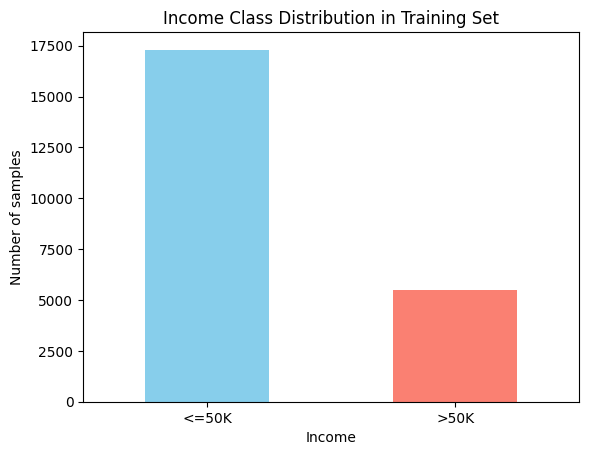

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
# Count of each class in training set
income_counts = y_train.value_counts() #.value_counts() #counts how many times each value appears in the column
print("Class distribution in training set:")
print(income_counts)

# Visualize
income_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Income Class Distribution in Training Set")
plt.xlabel("Income")
plt.ylabel("Number of samples")
plt.xticks(ticks=[0, 1], labels=[category_mappings['income'][0], category_mappings['income'][1]], rotation=0)
plt.show()
# How many people earn <=50K vs >50K in the training data

In [ ]:
for col in X_train.columns:
  #This creates a cross-tabulation table (a frequency table) that shows:
  #For each value in this feature, how many samples belong to each income class.
    cross_tab = pd.crosstab(X_train[col], y_train)
    #instead 0,1 show the true values(<50,>=50)
    cross_tab.columns = [category_mappings['income'][0], category_mappings['income'][1]]
    print(f"\nFeature: {col}")
    print(cross_tab)
    #This prints a table for each feature, showing counts of each income class
    #You can identify which features are most predictive (e.g., workclass, education, occupation, etc.)



Feature: workclass
           <=50K  >50K
workclass             
0           1155   140
1          12366  3487
2            673   246
3            400   266
4           1279   494
5            364   427
6           1052   429
7             10     0
8              4     0

Feature: education
           <=50K  >50K
education             
0           6144  1171
1           4110   976
2            438    23
3            608    43
4             69   217
5            108   292
6           2204  1544
7            553   665
8            803    44
9            569   192
10           711   261
11           115     5
12           226    10
13           267    26
14           341    20
15            37     0

Feature: marital.status
                <=50K  >50K
marital.status             
0                 637    59
1                2823   322
2                 663    45
3                7125   341
4                5770  4696
5                 276    19
6                   9     7

Feature: occupa

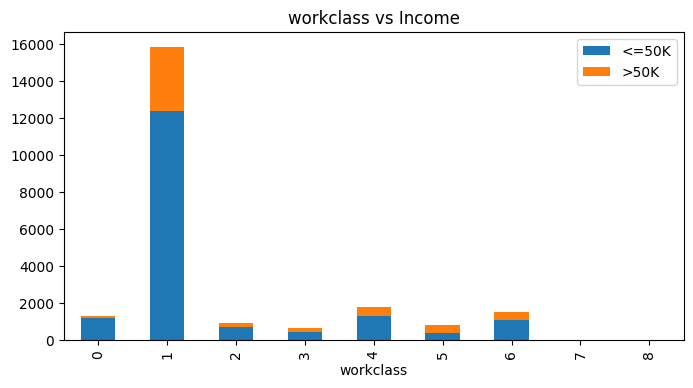

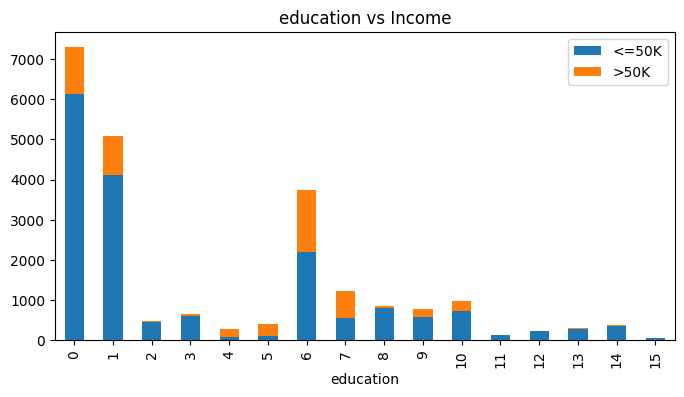

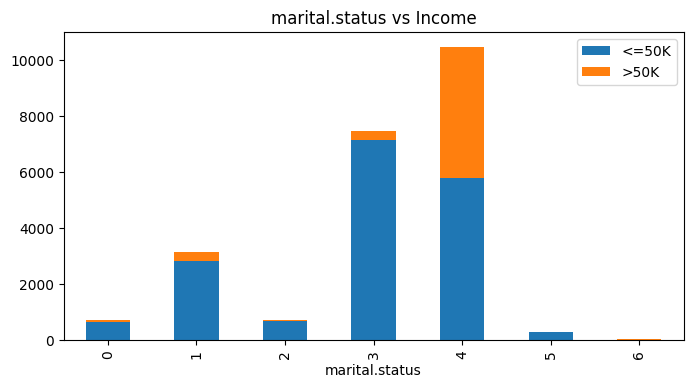

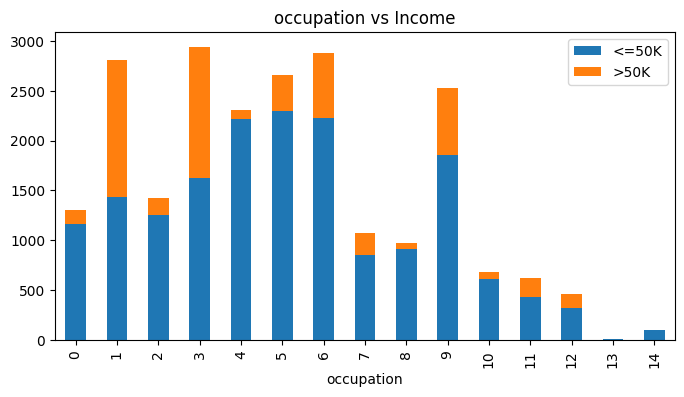

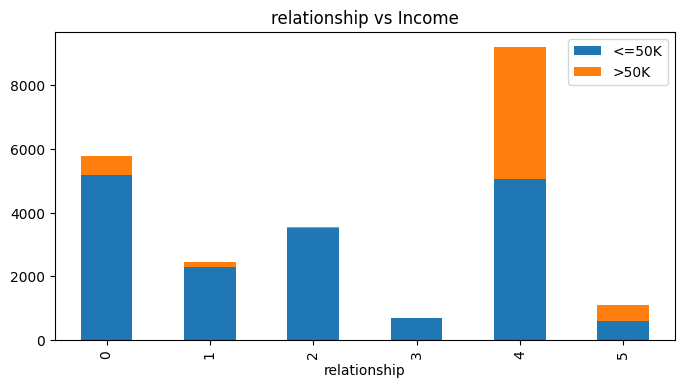

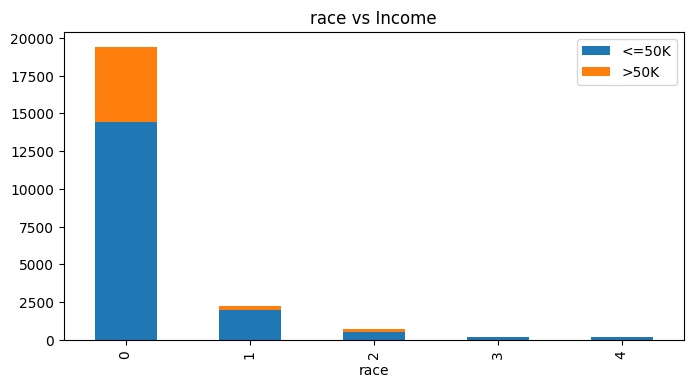

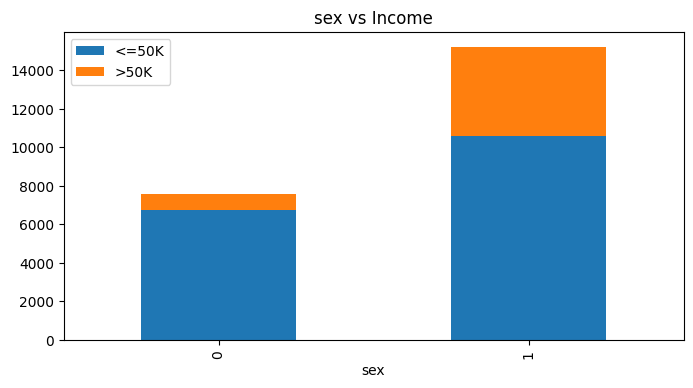

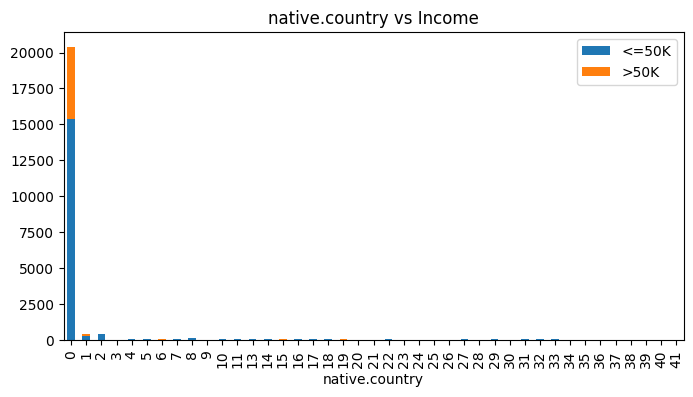

In [ ]:
for col in X_train.columns:
    cross_tab = pd.crosstab(X_train[col], y_train)
    cross_tab.columns = [category_mappings['income'][0], category_mappings['income'][1]]
    cross_tab.plot(kind='bar', stacked=True, figsize=(8,4), title=f"{col} vs Income")
    plt.show()


# ***B2.Full Mathematical Implementation***

Naïve Bayes works in two main parts:

Class priors — how common each class is.

Feature likelihoods — how likely each feature value is given a class

### Class Prior Probability (with Laplace Smoothing)

$$\text{The prior for each class \(C_k\) is computed using Laplace smoothing:} $$

$$P(C_k) = \frac{N_k + \alpha}{N + \alpha \cdot K}$$

Where:

- $$N_k = \text{number of samples in class \(C_k\)}$$
- $$N = \text{total number of samples}$$
- $$K = \text{number of classes}$$

- $$\alpha = \text{Laplace smoothing constant}$$

Alpha Importance:

1. Avoid zero probabilities:
If some class doesn’t appear in the training set (rare, but possible), without α its probability would be 0. That can break Naïve Bayes, because multiplying by 0 will make the posterior 0.

2. Regularization / smoothing:
Even if a class exists, α slightly adjusts probabilities, making the model more stable with small datasets or rare classes.

- For large datasets, the effect of α is tiny.

- For small datasets or rare categories, it can prevent zeros.

α>0 ensures no probability is zero

If α = 1 → “add-one smoothing” → each class gets 1 fake sample
Why multiply α by num_classes in denominator?

You added α “fake samples” to each class

Total number of fake samples = α × K

Denominator must reflect total real + total fake samples, so it sums to a valid probability.

### Feature Likelihood (with Laplace Smoothing)

The likelihood of a feature value $x_i = v$ given class $C_k$ is:

$$P(x_i = v \mid C_k) = \frac{N_{v,k} + \alpha}{N_k + \alpha \cdot V_i}$$

Where:

* $N_{v,k} = \text{number of times feature value } v \text{ appears in class } C_k$
* $N_k = \text{total number of samples in class } C_k$
* $V_i = \text{number of unique values for feature } x_i$
* $\alpha = \text{Laplace smoothing constant}$

Alpha importance:

1. Adds a small count to every possible feature value, even if it didn’t appear in the training class.

2. Prevents zeros in probability calculations.

3. Slightly adjusts probabilities for more stable predictions.


| Aspect                                 | Without α                    | With α                      |
| -------------------------------------- | ---------------------------- | --------------------------- |
| Formula (prior/likelihood)             | simple counts / frequencies  | counts + α / adjusted total |
| Risk                                   | Zero probabilities           | Avoids zero probabilities   |
| Effect on large datasets               | negligible                   | small                       |
| Effect on small datasets / rare values | bad, can dominate prediction | stabilizes prediction       |


In [ ]:
  def compute_priors_and_likelihoods_simple(X_train, y_train, alpha=0.1):
      # All classes
      classes = np.unique(y_train)
      num_classes = len(classes)

      # Count of samples per class
      class_counts = y_train.value_counts().to_dict()
      total_samples = len(y_train)

      # Priors with Laplace smoothing
      priors = {}
      for c in classes:
          priors[c] = (class_counts[c] + alpha) / (total_samples + alpha * num_classes)

      # Likelihoods
      likelihoods = {}
      #Loop over features(coloumns)
      #col: current feature
      for col in X_train.columns:
          likelihoods[col] = {}
          values = X_train[col].unique()
          for c in classes:
            # Initialize class dict even if class has no samples for some values
            likelihoods[col][c] = {}
            subset = X_train[y_train == c][col]
            value_counts = subset.value_counts().to_dict()
            V = len(values)
            for v in values:
                count = value_counts.get(v, 0)
                likelihoods[col][c][v] = (count + alpha) / (class_counts[c] + alpha * V)


  #subset = ['Private', 'Government', 'Private']
  #value_counts = {'Private': 2, 'Government': 1}




      return priors, likelihoods



### Prediction Rule (Naïve Bayes) 🚀

We choose the class $C_k$ that maximizes the posterior probability (proportional to Bayes' theorem, ignoring the evidence term $P(\mathbf{x})$):

$$
\hat{y} = \arg\max_k \left[ P(C_k) \prod_{i=1}^{n} P(x_i \mid C_k) \right]
$$

---



In [ ]:
def predict_naive_bayes_simple(priors, likelihoods, sample):
    best_class = None
    max_prob = -1

    for c in priors:
        prob = priors[c]
        for feature in sample.index:
            value = sample[feature]
            prob *= likelihoods[feature][c].get(value, 1e-6)
        if prob > max_prob:
            max_prob = prob
            best_class = c

    return best_class


# Test

In [ ]:
import numpy as np

priors, likelihoods = compute_priors_and_likelihoods_simple(X_train, y_train, alpha=1)

y_test_pred = []

for i in range(len(X_test)):
    sample = X_test.iloc[i]
    pred = predict_naive_bayes_simple(priors, likelihoods, sample)
    y_test_pred.append(pred)

y_test_pred = np.array(y_test_pred)

from sklearn.metrics import accuracy_score, classification_report

test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_acc)

print("\nTest Report:")
print(classification_report(
    y_test,
    y_test_pred,
    target_names=[category_mappings['income'][0], category_mappings['income'][1]]
))




Test Accuracy: 0.7918116683725691

Test Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.81      0.86      3709
        >50K       0.55      0.73      0.63      1176

    accuracy                           0.79      4885
   macro avg       0.73      0.77      0.74      4885
weighted avg       0.82      0.79      0.80      4885



# ***B3. Analysis & Evaluation***

 ***1. Effect of α (Laplace Smoothing)***

α = 0.1: Validation Accuracy = 0.7893
α = 0.5: Validation Accuracy = 0.7891
α = 1.0: Validation Accuracy = 0.7889
α = 2.0: Validation Accuracy = 0.7889
α = 5.0: Validation Accuracy = 0.7885


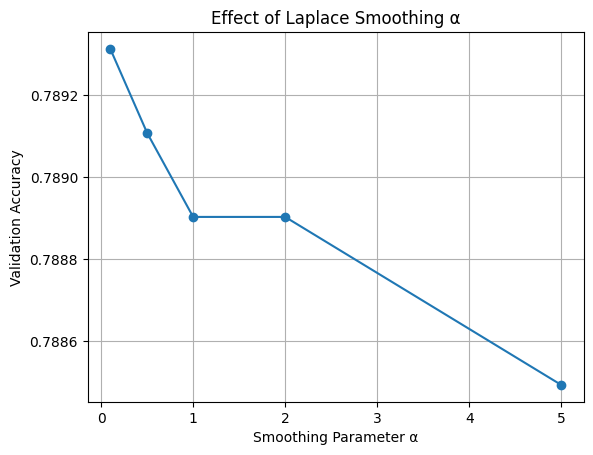

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]
alpha_accuracies = []

for alpha in alpha_values:
    priors_a, likelihoods_a = compute_priors_and_likelihoods_simple(X_train, y_train, alpha=alpha)

    y_val_pred = [
        predict_naive_bayes_simple(priors_a, likelihoods_a, X_val.iloc[i])
        for i in range(len(X_val))
    ]

    acc = accuracy_score(y_val, y_val_pred)
    alpha_accuracies.append(acc)
    print(f"α = {alpha}: Validation Accuracy = {acc:.4f}")

plt.plot(alpha_values, alpha_accuracies, marker='o')
plt.xlabel("Smoothing Parameter α")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Laplace Smoothing α")
plt.grid(True)
plt.show()


| α value | Meaning               | Typical effect                                                                         |
| ------- | --------------------- | -------------------------------------------------------------------------------------- |
| **0.1** | Very small smoothing  | Model relies heavily on real data. Rare values can still dominate. Risk of overfitting |
| **0.5** | Light smoothing       | Slightly safer than 0.1                                                                |
| **1.0** | Standard Laplace      | Good balance, most common                                                              |
| **2.0** | Strong smoothing      | Values become more “similar” across classes                                            |
| **5.0** | Very strong smoothing | Data differences get washed out → underfitting                                         |

The Laplace smoothing parameter α significantly influences model performance. As α increased from 0.1 to 5.0, validation accuracy showed a gradual decline. This indicates that large smoothing values oversimplify the probability distributions and reduce the influence of important features. The best performance was achieved at α = 0.1, suggesting that minimal smoothing is most suitable for this dataset.

Too low α → risk of overfitting

Too high α → underfitting

Best value = depends on dataset size & noise


***2. Feature Subset Experiments***

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import combinations


# List of features to test
all_features = X_train.columns.tolist() #convert to list

# Store results
subset_accuracies = []

# Test all subsets of size 1 to 3
for r in range(1, 4):
    for subset in combinations(all_features, r): #generates all possible subsets of size r
        subset = list(subset) #convert to list
        X_train_sub = X_train[subset]
        X_val_sub = X_val[subset]

        # Compute priors and likelihoods
        priors, likelihoods = compute_priors_and_likelihoods_simple(X_train_sub, y_train, alpha=1.0)

        # Predict on validation set

        y_val_pred = [
          predict_naive_bayes_simple(priors, likelihoods, X_val_sub.iloc[i])
          for i in range(len(X_val_sub))
      ]


        # Compute accuracy
        acc = accuracy_score(y_val, y_val_pred)
        subset_accuracies.append((subset, acc))
        print(f"Features: {subset} => Validation Accuracy: {acc:.4f}")


subset_accuracies.sort(key=lambda x: x[1], reverse=True)
print("\nTop 5 feature subsets by validation accuracy:")
for subset, acc in subset_accuracies[:5]:
    print(f"{subset}: {acc:.4f}")




Features: ['workclass'] => Validation Accuracy: 0.7678
Features: ['education'] => Validation Accuracy: 0.7852
Features: ['marital.status'] => Validation Accuracy: 0.7592
Features: ['occupation'] => Validation Accuracy: 0.7592
Features: ['relationship'] => Validation Accuracy: 0.7592
Features: ['race'] => Validation Accuracy: 0.7592
Features: ['sex'] => Validation Accuracy: 0.7592
Features: ['native.country'] => Validation Accuracy: 0.7592
Features: ['workclass', 'education'] => Validation Accuracy: 0.7924
Features: ['workclass', 'marital.status'] => Validation Accuracy: 0.7744
Features: ['workclass', 'occupation'] => Validation Accuracy: 0.7606
Features: ['workclass', 'relationship'] => Validation Accuracy: 0.7764
Features: ['workclass', 'race'] => Validation Accuracy: 0.7682
Features: ['workclass', 'sex'] => Validation Accuracy: 0.7697
Features: ['workclass', 'native.country'] => Validation Accuracy: 0.7680
Features: ['education', 'marital.status'] => Validation Accuracy: 0.8202
Featu

***3. Probability Distribution Analysis***

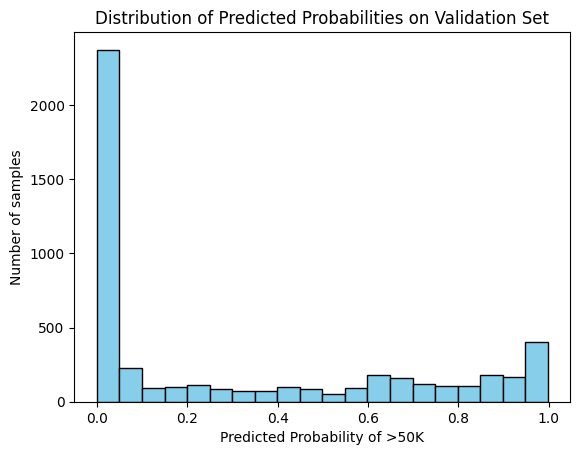

In [ ]:
# Compute priors and likelihoods
priors, likelihoods = compute_priors_and_likelihoods_simple(X_train, y_train, alpha=1)

def predict_proba_simple(X, priors, likelihoods, cols):
    probs = []
    #loop over each sample
    for i in range(len(X)):
        sample = X.iloc[i]
        # Compute unnormalized posterior for each class
        post_0 = priors[0]
        post_1 = priors[1]
        for col in cols:
            val = sample[col]
            post_0 *= likelihoods[col][0].get(val, 1e-9)
            post_1 *= likelihoods[col][1].get(val, 1e-9)
        # Normalize
        prob_1 = post_1 / (post_0 + post_1)
        probs.append(prob_1)
    return np.array(probs)

# Predict normalized probabilities for class 1 (>50K)
probs_val = predict_proba_simple(X_val, priors, likelihoods, X_train.columns)

# Plot histogram
import matplotlib.pyplot as plt

plt.hist(probs_val, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Predicted Probability of >50K")
plt.ylabel("Number of samples")
plt.title("Distribution of Predicted Probabilities on Validation Set")
plt.show()


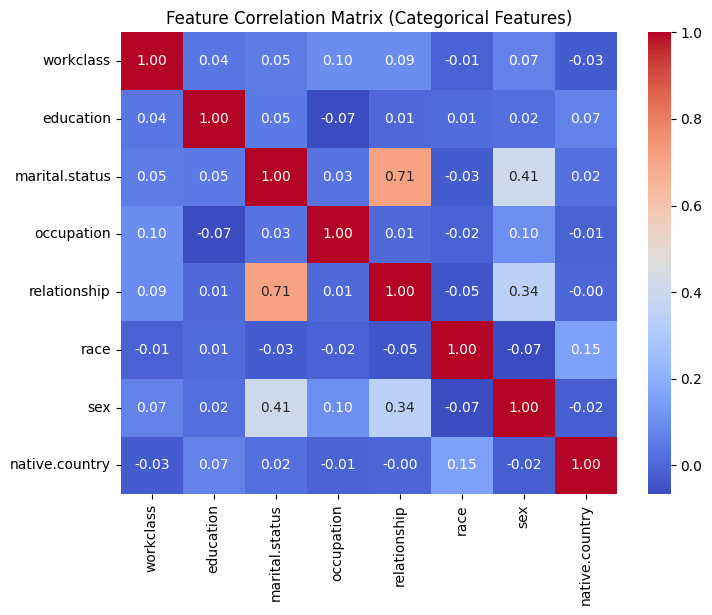

In [ ]:
import seaborn as sns

df_corr = df_new.drop("income", axis=1).copy()
for col in df_corr.columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df_corr.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix (Categorical Features)")
plt.show()



 **4. Compare With sklearn MultinomialNB**

Sklearn MultinomialNB Validation Accuracy: 73.75%

Confusion Matrix:
[[3036  672]
 [ 610  566]]


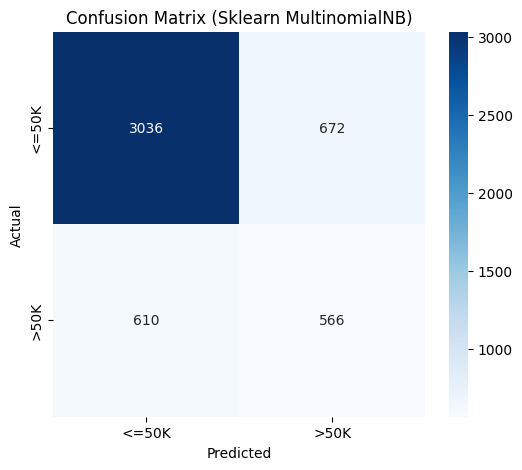


Classification Report:
              precision    recall  f1-score   support

       <=50K       0.83      0.82      0.83      3708
        >50K       0.46      0.48      0.47      1176

    accuracy                           0.74      4884
   macro avg       0.64      0.65      0.65      4884
weighted avg       0.74      0.74      0.74      4884



In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X_train_skl = X_train.copy()
X_val_skl = X_val.copy()

# Initialize and train MultinomialNB
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train_skl, y_train)

# Predict on validation set
y_val_pred_skl = mnb.predict(X_val_skl)

# Compute accuracy
accuracy_skl = np.mean(y_val_pred_skl == y_val)
print(f"Sklearn MultinomialNB Validation Accuracy: {accuracy_skl*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred_skl)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[category_mappings['income'][0], category_mappings['income'][1]],
            yticklabels=[category_mappings['income'][0], category_mappings['income'][1]])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Sklearn MultinomialNB)")
plt.show()

# Optional: classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_skl, target_names=[category_mappings['income'][0], category_mappings['income'][1]]))
